In [3]:
import pandas as pd
import time
import datetime


In [6]:
df = pd.read_json('anyscale-1696986303_raw.json')

In [7]:
# This is the standard analysis we would do in the real script

print('Validity results:')
print(df['valid'].value_counts())
cdf = df[df.valid !='Exception'].copy()
print(f'Clean DF is: {len(cdf)}')
cdf['inter_tokens_delay'] = (cdf.total_time-cdf.ttft)/cdf.tokens_out
cdf['total_tokens_per_s'] = (cdf.tokens_out + cdf.tokens_in)/cdf.total_time
cdf['out_tokens_per_s'] = cdf.tokens_out/(cdf.total_time-cdf.ttft)
mean_tokens_in = cdf['tokens_in'].mean() 
mean_tokens_out = cdf['tokens_out'].mean() 
mean_ttft = cdf['ttft'].mean()
gt_3_ttft = len(cdf[cdf['ttft'] > 3])/len(cdf)
print(f'Mean TTFT: {mean_ttft*1000:.0f} ms (mean tokens in: {mean_tokens_in:.0f}, out: {mean_tokens_out:.0f})')
print(f'TTFT > 3 s: {gt_3_ttft*100:.2f}%')
print(f'ITL (out): {cdf.inter_tokens_delay.mean()*1000:.2f} ms/token, mean tokens/s output (out): {cdf.out_tokens_per_s.mean():.2f} token/s')


Validity results:
OK          296
Mismatch      4
Name: valid, dtype: int64
Clean DF is: 300
Mean TTFT: 488 ms (mean tokens in: 494, out: 137)
TTFT > 3 s: 0.00%
ITL (out): 56.41 ms/token, mean tokens/s output (out): 17.75 token/s


In [8]:
len(cdf)

300

<Axes: xlabel='tokens_in', ylabel='ttft'>

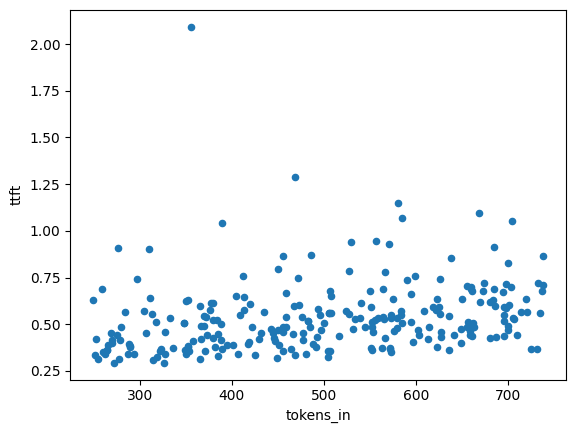

In [8]:
cdf.plot.scatter(y='ttft', x='tokens_in')

<Axes: xlabel='tokens_out', ylabel='total_time'>

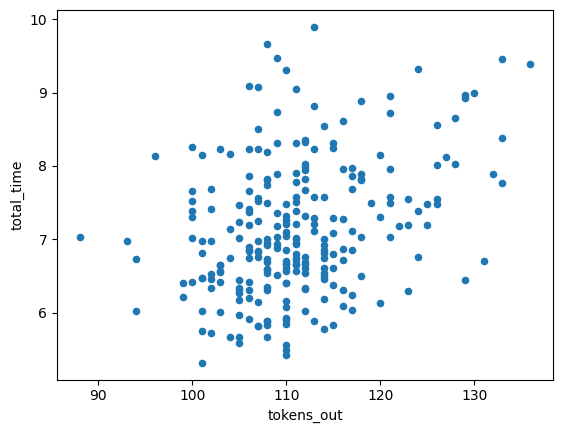

In [9]:
cdf.plot.scatter(y='total_time', x='tokens_out')

In [10]:
cdf.describe()

,ttft,total_time,tokens_in,tokens_out,total_tokens_per_s,out_tokens_per_s
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,0.538204,7.139723,497.976096,111.127490,86.219960,17.070216
std,0.194557,0.919428,140.339672,7.842938,21.740809,2.110613
min,0.293696,5.315840,249.000000,88.000000,47.120633,11.908753
25%,0.411385,6.499027,378.500000,106.000000,69.410502,15.485005
50%,0.506000,6.999253,497.000000,110.000000,84.039700,17.042858
75%,0.608667,7.719068,621.500000,115.000000,99.967552,18.275836
max,2.092355,9.898334,738.000000,136.000000,145.170690,22.101830


<Axes: ylabel='Frequency'>

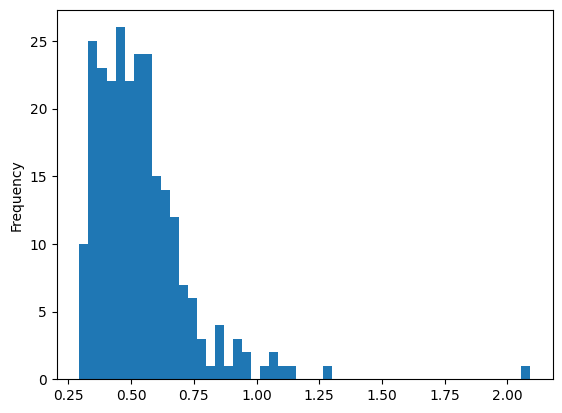

In [11]:
cdf['ttft'].plot.hist(bins=50)

In [28]:
list(df[df['valid'] == 'Exception']['cause'].to_numpy())

["Invalid response object from API: '' (HTTP response code was 404)",
 "Invalid response object from API: '' (HTTP response code was 404)",
 "Invalid response object from API: '' (HTTP response code was 404)",
 "Invalid response object from API: '' (HTTP response code was 404)",
 "Invalid response object from API: '' (HTTP response code was 404)",
 "Invalid response object from API: '' (HTTP response code was 404)",
 "Invalid response object from API: '' (HTTP response code was 404)",
 "Invalid response object from API: '' (HTTP response code was 404)",
 "Invalid response object from API: '' (HTTP response code was 404)",
 "Invalid response object from API: '' (HTTP response code was 404)",
 "Invalid response object from API: '' (HTTP response code was 404)",
 "Invalid response object from API: '' (HTTP response code was 404)",
 "Invalid response object from API: '' (HTTP response code was 404)",
 "Invalid response object from API: '' (HTTP response code was 404)",
 "Invalid response o